In [2]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy.io import fits
from scipy.stats import mode
from astropy.io import ascii
from itertools import chain
from matplotlib.ticker import MultipleLocator
from scipy.signal import argrelextrema

In [31]:
# getting 10 flat field images
def file_name(file_dir):
    L=[]
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if os.path.splitext(file)[1] == '.FIT':
                L.append(os.path.join(root, file))
    return L
flatnames=file_name('./previous_data/flat_dome/')
flats=[]
flatsdata=[]
for i in range(len(flatnames)):
    flats.append(i)
    flatsdata.append(i)
    flats[i]=fits.open(flatnames[i])
    flatsdata[i]=flats[i][0].data
m_flat=sum(flatsdata)/len(flatsdata)


[[ 8318.  8308.  8310. ...,  8247.  8239.  8243.]
 [ 8311.  8317.  8320. ...,  8240.  8238.  8237.]
 [ 8318.  8316.  8314. ...,  8243.  8238.  8242.]
 ..., 
 [ 8318.  8306.  8321. ...,  8232.  8229.  8230.]
 [ 8308.  8311.  8305. ...,  8235.  8230.  8234.]
 [ 8304.  8325.  8312. ...,  8237.  8237.  8241.]]
[[ 8314.  8323.  8315. ...,  8239.  8246.  8237.]
 [ 8324.  8319.  8315. ...,  8230.  8244.  8239.]
 [ 8327.  8321.  8316. ...,  8240.  8242.  8243.]
 ..., 
 [ 8328.  8317.  8316. ...,  8236.  8232.  8242.]
 [ 8317.  8316.  8302. ...,  8242.  8235.  8240.]
 [ 8313.  8314.  8317. ...,  8237.  8237.  8243.]]
[[ 8331.  8328.  8313. ...,  8256.  8249.  8246.]
 [ 8332.  8325.  8325. ...,  8240.  8260.  8240.]
 [ 8318.  8323.  8327. ...,  8249.  8247.  8250.]
 ..., 
 [ 8320.  8317.  8321. ...,  8246.  8240.  8255.]
 [ 8329.  8322.  8319. ...,  8248.  8239.  8250.]
 [ 8324.  8327.  8326. ...,  8239.  8253.  8243.]]
[[ 8336.  8339.  8328. ...,  8260.  8256.  8251.]
 [ 8329.  8327.  8328. ...

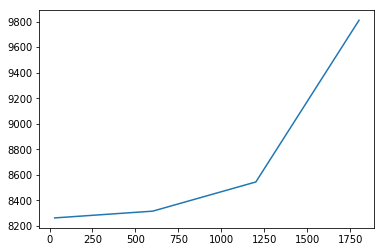

In [21]:
# Master Darks
# 30 second master
dark_10s = []
for i in range(1, 10):
    file = fits.open('previous data/dark-10s/dark_.0000000{0}.DARK.FIT'.format(i))
    dark_10s.append(file[0].data)
    file.close() 
mdark_10s = np.empty(shape=dark_10s[0].shape)
for i in range(len(dark_10s[0])):
    for j in range(len(dark_10s[0][0])):
        med = []
        for file in dark_10s:
            med.append(file[i][j])
        mdark_10s[i][j] = np.median(med)
try:
    fits.PrimaryHDU(mdark_10s).writeto('masters/masterdark_10s.fits')
except OSError:
    print(mdark_10s)


dark_30s = []
for i in range(1, 10):
    file = fits.open('previous data/dark-30s/dark_.0000001{0}.DARK.FIT'.format(i))
    dark_30s.append(file[0].data)
    file.close()
mdark_30s = np.empty(shape=dark_30s[0].shape)
for i in range(len(dark_30s[0])):
    for j in range(len(dark_30s[0][0])):
        med = []
        for file in dark_30s:
            med.append(file[i][j])
        mdark_30s[i][j] = np.median(med)
try:
    fits.PrimaryHDU(mdark_30s).writeto('masters/masterdark_30s.fits')
except OSError:
    print(mdark_30s)
    

dark_2m = []
for i in range(1, 10):
    file = fits.open('previous data/dark-2min/dark_.0000002{0}.DARK.FIT'.format(i))
    dark_2m.append(file[0].data)
    file.close()
mdark_2m = np.empty(shape=dark_2m[0].shape)
for i in range(len(dark_2m[0])):
    for j in range(len(dark_2m[0][0])):
        med = []
        for file in dark_2m:
            med.append(file[i][j])
        mdark_2m[i][j] = np.median(med)
try:
    fits.PrimaryHDU(mdark_2m).writeto('masters/masterdark_2m.fits')
except OSError:
    print(mdark_2m)
    

dark_3m = []
for i in range(1, 10):
    file = fits.open('previous data/dark-3min/dark_.0000003{0}.DARK.FIT'.format(i))
    dark_3m.append(file[0].data)
    file.close()
mdark_3m = np.empty(shape=dark_3m[0].shape)
for i in range(len(dark_3m[0])):
    for j in range(len(dark_3m[0][0])):
        med = []
        for file in dark_3m:
            med.append(file[i][j])
        mdark_3m[i][j] = np.median(med)
try:
    fits.PrimaryHDU(mdark_3m).writeto('masters/masterdark_3m.fits')
except OSError:
    print(mdark_3m)
    

dark_5m = []
for i in range(1, 10):
    file = fits.open('previous data/dark-5min/dark_.0000004{0}.DARK.FIT'.format(i))
    dark_5m.append(file[0].data)
    file.close()
mdark_5m = np.empty(shape=dark_3m[0].shape)
for i in range(len(dark_5m[0])):
    for j in range(len(dark_5m[0][0])):
        med = []
        for file in dark_5m:
            med.append(file[i][j])
        mdark_5m[i][j] = np.median(med)
try:
    fits.PrimaryHDU(mdark_5m).writeto('masters/masterdark_5m.fits')
except OSError:
    print(mdark_5m)
    
    
dark_10m = []
for i in range(1, 10):
    file = fits.open('previous data/dark-10min/dark_.0000005{0}.DARK.FIT'.format(i))
    dark_10m.append(file[0].data)
    file.close()
mdark_10m = np.empty(shape=dark_10m[0].shape)
for i in range(len(dark_10m[0])):
    for j in range(len(dark_10m[0][0])):
        med = []
        for file in dark_10m:
            med.append(file[i][j])
        mdark_10m[i][j] = np.median(med)
try:
    fits.PrimaryHDU(mdark_10m).writeto('masters/masterdark_5m.fits')
except OSError:
    print(mdark_10m)

In [14]:
# getting 10 flat field images
flats = []
for i in range(0,10):
    fname = '../data/30s_4000_flat.0000000{0}.FLAT.FIT'.format(i+1)
    try: 
        file = fits.open(fname)
    except FileNotFoundError:
        fname = fits.open('../data/30s_4000_flat.00000009.FLAT.FIT')
    flats.append(file[0].data)
    file.close()
# average combine the flats
m_flats=sum(flats)/10-mdark_30s
m_flats_norm=m_flats/np.mean(m_flats)
avgcounts=fits.PrimaryHDU(m_flats)
#avgcounts.writeto('../data/avgcounts_flatfields.fits')

In [15]:
# Apply Darks & Flats
neb_10m_1,head1=fits.getdata('../data/10m_4000_neb.00000026.NOAUTODARK.FIT',0,header=True)
neb_10m_2,head2=fits.getdata('../data/10m_4000_neb.00000027.NOAUTODARK.FIT',0,header=True)
neb_20m_1,head3=fits.getdata('../data/20mseries_4000_neb.00000000.FIT',0,header=True)
neb_20m_2,head4=fits.getdata('../data/20mseries_4000_neb.00000001.FIT',0,header=True)
neb_30m,head5=fits.getdata('../data/30m_4000_neb.00000000.NOAUTODARK.FIT',0,header=True)

# subtracting darks and dividing flats
newneb_10m_1=(neb_10m_1-mdark_10m)/m_flats_norm
newneb_10m_2=(neb_10m_2-mdark_10m)/m_flats_norm
newneb_20m_1=(neb_20m_1-mdark_20m)/m_flats_norm
newneb_20m_2=(neb_20m_2-mdark_20m)/m_flats_norm
newneb_30m=(neb_30m-mdark_30m)/m_flats_norm

#cut the halt part of the slit where neb shines through
cutneb_10m_1=newneb_10m_1[64:94]
cutneb_10m_2=newneb_10m_2[64:94]
cutneb_20m_1=newneb_20m_1[64:94]
cutneb_20m_2=newneb_20m_2[64:94]
cutneb_30m=newneb_30m[64:94]

In [12]:
##For 10min and 30min we use aotodark images
#get autodark data and apply flats
#neb10m_1=fits.open('../data/10m_4000_neb.00000026.FIT')[0].data
#neb10m_2=fits.open('../data/10m_4000_neb.00000027.FIT')[0].data
#neb30m_1=fits.open('../data/30m_4000_neb.00000000.FIT')[0].data
#newneb10m_1=neb10m_1/m_flats_norm
#newneb10m_2=neb10m_2/m_flats_norm
#newneb30m_1=neb30m_1/m_flats_norm #processed 10min and 30min science images
#cutneb10m_1=newneb10m_1[64:94,:]
#cutneb10m_2=newneb10m_2[64:94,:]
#cutneb30m_1=newneb30m_1[64:94,:]

In [13]:
# make the spectra 1D by averaging column by column
spec_neb10m_1=np.mean(cutneb10m_1,axis=0)
spec_neb10m_2=np.mean(cutneb10m_2,axis=0)
spec_neb30m_1=np.mean(cutneb30m_1,axis=0)
spec_neb20m_1=np.mean(cutneb_20m_1,axis=0)
spec_neb20m_2=np.mean(cutneb_20m_2,axis=0)

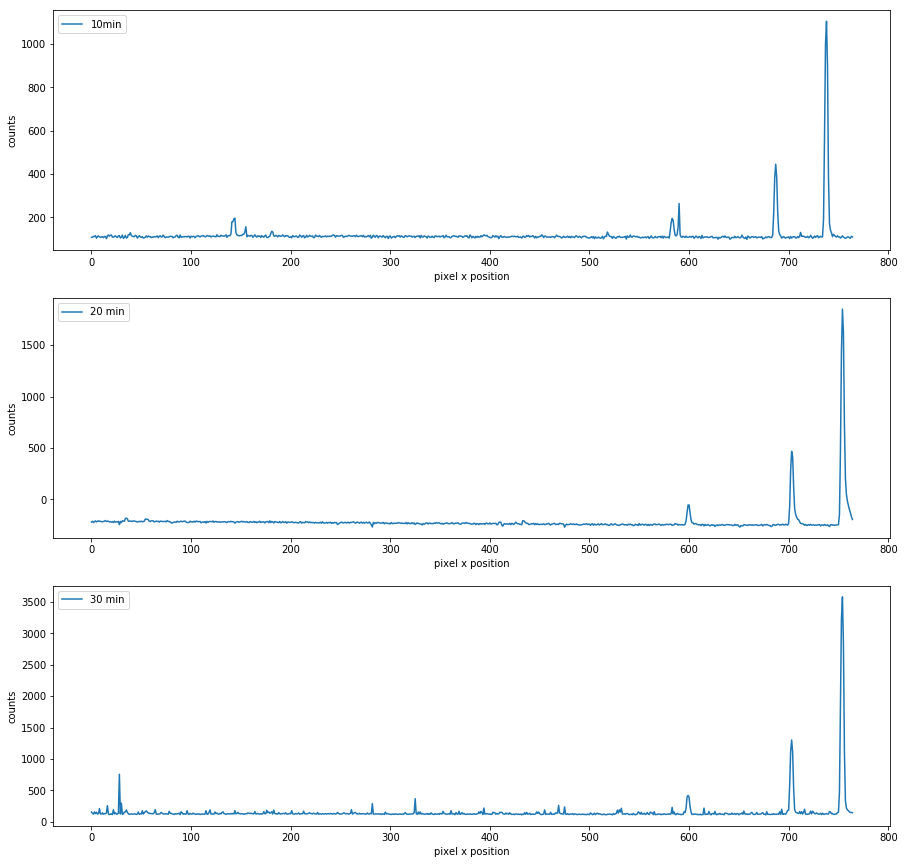

In [8]:
x_pos=np.array([i for i in range(765)])
# plot spectra as a function of pixel position
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

ax1.plot(x_pos,spec_neb10m_1, label='10min')
ax1.set_xlabel('pixel x position')
ax1.set_ylabel('counts')
ax1.legend()
ax2.plot(x_pos,spec_neb20m_1, label='20 min')
ax2.set_xlabel('pixel x position')
ax2.set_ylabel('counts')
ax2.legend()
ax3.plot(x_pos,spec_neb30m_1, label='30 min')
ax3.set_xlabel('pixel x position')
ax3.set_ylabel('counts')
ax3.legend()

Here we plotted the spectra for different exposure times(10min 20min 30min). For 10min and 30min, we used the autodark science image divied by master flat. For 20min, we didn't take autodark, so we just followed the traditional way, which is extract master dark and then divide master flat. But since we didn't take science image ang dark frames on the same day with the exact same set-up, it resulted in negetive counts values after we applied master dark and flat. We can even see some "absorbtion" line in the 20min. 
There may be something wrong with the dark drames we took. The counts value in our dark image as a function of exposure time doesn't seem to be linear.
So we only did wavelength calibration for 10min and 30min exposures.

In [9]:
#get the indices for the accounts value peaks
index_peak10m=argrelextrema(spec_neb10m_1,np.greater,order=35)
index_peak30m=argrelextrema(spec_neb30m_1,np.greater,order=10)
print(index_peak10m)
print(index_peak30m)

(array([ 39,  89, 144, 243, 283, 394, 452, 518, 590, 687, 738]),)
(array([ 16,  28,  51,  64,  78,  96, 119, 132, 144, 164, 183, 201, 213,
       227, 247, 261, 282, 295, 325, 341, 361, 394, 455, 469, 501, 532,
       549, 565, 583, 599, 615, 655, 678, 703, 716, 754]),)


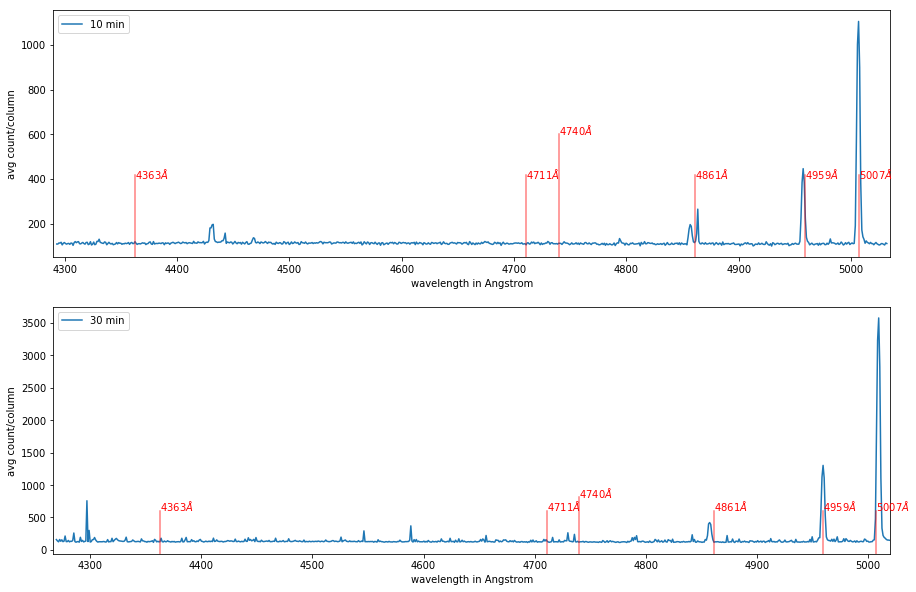

In [126]:
# from the extrema value we picked the potential x-position for OIII lines and Hbeta line
# and fit linear relation to the actual wavelength
wl=[4363,4861,4959,5007] #OIII 4363, Hbeta 4861, OIII 4959, OIII 5007
x_pos10m=[72,590,687,738]
x_pos30m=[96,599,703,754]
fit10m=np.polyfit(x_pos10m,wl,1)
fit30m=np.polyfit(x_pos30m,wl,1)
# with fitting line, get the expected wavelength
linear10m=np.poly1d(fit10m)
linear30m=np.poly1d(fit30m)
exp_wl10m=linear10m(x_pos)
exp_wl30m=linear30m(x_pos)

# plot calibrated spectra
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
labelx=np.array([4363,4711,4740,4861,4959,5007])
labely10=np.array([400,400,600,400,400,400])
labely30=np.array([600,600,800,600,600,600])

ax1.plot(exp_wl10m,spec_neb10m_1,label='10 min')
for i in range(len(labelx)):
    ax1.axvline(x=labelx[i], ymin=0, ymax=labely10[i]/1200,c='r',alpha=0.5)
    ax1.text(labelx[i],labely10[i],str(int(labelx[i]))+'$\AA$',color='r')
ax1.set_xlim(4290,5035)
ax1.set_xlabel('wavelength in Angstrom')
ax1.set_ylabel('avg count/column')
ax1.legend()

ax2.plot(exp_wl30m,spec_neb30m_1,label='30 min')
for i in range(len(labelx)):
    ax2.axvline(x=labelx[i], ymin=0, ymax=labely30[i]/3500,c='r',alpha=0.5)
    ax2.text(labelx[i],labely30[i],str(int(labelx[i]))+'$\AA$',color='r')
ax2.set_xlim(4267,5020)
ax2.set_xlabel('wavelength in Angstrom')
ax2.set_ylabel('avg count/column')
ax2.legend()


Here are the wavelength-calibrated spectra for our wavelength setting. The vertical red lines are the lines that we are supposed to get from observation to calculate temperature and gas density. Among the six lines, 4363(OIII), 4711(ArIV), 4740(ArIV), 4861($H_{\beta}$), 4959(OIII), 5007(OIII), we could see from our spectra that the three lines 4861($H_{\beta}$), 4959(OIII), 5007(OIII) are captured clearly, although with some deviation. But the other three lines could not be identified very easily.